In [6]:
import numpy as np
import json
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42

num_chains = 25  # Number of chains
chain_length = 4  # Number of H atoms per chain
bond_length_interval = 0.1


methods = ["CASSCF", "HF", "B3LYP", "sto-3G", "basisNN", "ccpVDZ", "AVAS"]

method_index = {
    'basisNN': 0,
    'CASSCF': 1,
    'HF': 2,
    "B3LYP": 3,
    'sto-3G': 4,
    'AVAS': 5
}

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

def get_name_method_mapping(methods):
    name_method = {}
    for method in methods:
        if method == 'ccpVDZ' or method == 'sto-3G':
            name_method[method] = method
        elif method == 'HF' or method == 'B3LYP':
            name_method[method] = f"Molecule Orbital({method})"
        elif method == 'CASSCF':
            name_method[method] = f"{method} active space"
        elif method == 'basisNN':
            name_method[method] = "ML predicted basis"
        elif method == 'AVAS':
            name_method[method] = "AVAS"
        else:
            raise Exception("Error message")
    
    return name_method

def plot_energy_distribution(methods, energy_data, name_l, method_index, colors):
    lengths = []
    for point in range(3, num_chains + 1):
        bond_length = bond_length_interval * point
        lengths.append(bond_length)
    
    numeric_values = np.array([int(name.split('.')[0]) for name in name_l])
    sorted_indices = np.argsort(numeric_values)
    
    # Create main figure
    fig, ax_main = plt.subplots(figsize=(10, 6))
    
    name_method = get_name_method_mapping(methods)
    
    # Plot main figure (Energy distribution)
    for method in methods:
        if method != 'ccpVDZ' and energy_data[method]:  # Ensure there's data to plot
            i = method_index[method]
            color = colors[i % len(colors)]
            if i == 0:
                ax_main.plot(np.array(energy_data[method])[sorted_indices], label=name_method[method], 
                           color=color, alpha=1, linewidth=1.2)
            else:
                ax_main.plot(np.array(energy_data[method])[sorted_indices], label=name_method[method], 
                           color=color, alpha=0.6, linewidth=1.2)
    ax_main.plot(np.array(energy_data['ccpVDZ'])[sorted_indices], label='ccpVDZ', 
                color='grey', linestyle='--')
    
    ax_main.set_xlabel("Configuration", fontsize=25)
    ax_main.set_ylabel("Energy (Hartree)", fontsize=25)
    ax_main.tick_params(axis='both', which='major', labelsize=23)
    ax_main.tick_params(axis='both', which='minor', labelsize=23)
    ax_main.grid(False)
    
    # Create an inset axes
    ax_inset = fig.add_axes([0.4, 0.6, 0.3, 0.3])  # Adjust inset position and size
    
    # Get baseline energy values
    baseline_energy = np.array(energy_data['ccpVDZ'])[sorted_indices]
    
    # Plot error relative to 'opt' inside inset
    for method in methods:
        if method != 'ccpVDZ' and energy_data[method]:  # Ensure there's data to plot
            i = method_index[method]
            color = colors[i % len(colors)]
            error = np.array(energy_data[method])[sorted_indices] - baseline_energy
            if i == 0:
                ax_inset.plot(error, label=f"{name_method[method]} - ccpVDZ", 
                            color=color, alpha=1, linewidth=2)
            else:
                ax_inset.plot(error, label=f"{name_method[method]} - ccpVDZ", 
                            color=color, alpha=0.6, linewidth=1.2)
    
    ax_inset.set_title("Basis Error", fontsize=25)
    ax_inset.tick_params(axis='both', which='major', labelsize=23)
    ax_inset.tick_params(axis='both', which='minor', labelsize=23)
    
    # Save and show the plot
    plt.tight_layout()
    plt.savefig("H4_E.pdf", metadata={"TextAsShapes": False})
    plt.close()
    
    


In [7]:
# open E_l_data.json
with open('E_l_data.json', 'r') as f:
    data = json.load(f)
    

plot_energy_distribution(methods, data['energy_data'], data["energy_data"]['name'], method_index, colors)

/tmp/ipykernel_116970/220795198.py:101: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/tmp/ipykernel_116970/220795198.py:102: UserWarning: Unknown infodict keyword: 'TextAsShapes'. Must be one of {'CreationDate', 'Author', 'Title', 'ModDate', 'Producer', 'Trapped', 'Subject', 'Keywords', 'Creator'}.
  plt.savefig("H4_E.pdf", metadata={"TextAsShapes": False})


In [8]:
def plot_l_norm_distribution(l_data, name_l, method_index, colors, methods):
    lengths = []
    for point in range(3, num_chains + 1):
        bond_length = bond_length_interval * point
        lengths.append(bond_length)
    
    # Plot the frequency distribution for each method using KDE
    plt.figure(figsize=(10, 6))
    
    numeric_values = np.array([int(name.split('.')[0]) for name in name_l])
    sorted_indices = np.argsort(numeric_values)
    
    name_method = get_name_method_mapping(methods)
    
    l_methods = ['CASSCF', 'HF', 'B3LYP', 'sto-3G', 'basisNN', 'AVAS']
    for method in l_methods:
        if l_data[method]:  # Ensure there's data to plot
            i = method_index[method]
            color = colors[i % len(colors)]
            if i == 0:
                plt.plot(np.array(l_data[method])[sorted_indices], label=name_method[method], 
                        color=color, alpha=1, linewidth=2)
            else:
                plt.plot(np.array(l_data[method])[sorted_indices], label=name_method[method], 
                        color=color, alpha=0.6, linewidth=1.2)
    
    # Configure the plot
    plt.xlabel("configuration", fontsize=25)
    plt.ylabel("l-1 norm (Hartree)", fontsize=25)
    plt.tick_params(axis='both', which='major', labelsize=23)
    plt.tick_params(axis='both', which='minor', labelsize=23)
    
    # Save the plot as a file
    output_file = "energy_distribution_smooth.pdf"
    plt.tight_layout()
    plt.savefig("figs/H4_l.pdf", metadata={"TextAsShapes": False})
    plt.close()
    
    print(f"Figure saved as {output_file}")
    
plot_l_norm_distribution(data['l_data'], data["energy_data"]['name'], method_index, colors, methods)

Figure saved as energy_distribution_smooth.pdf


/tmp/ipykernel_116970/4273433268.py:36: UserWarning: Unknown infodict keyword: 'TextAsShapes'. Must be one of {'CreationDate', 'Author', 'Title', 'ModDate', 'Producer', 'Trapped', 'Subject', 'Keywords', 'Creator'}.
  plt.savefig("figs/H4_l.pdf", metadata={"TextAsShapes": False})


[0.04122765 0.04370309 0.04457154 0.04410114 0.04261555 0.04018069
 0.03704827 0.03353887 0.02986863 0.02617034 0.02253202 0.01902279
 0.01571188 0.0126756  0.00998755 0.00769831 0.00582083 0.00433116
 0.00318097 0.00231217 0.00166736]


/tmp/ipykernel_116970/87708181.py:69: UserWarning: Unknown infodict keyword: 'TextAsShapes'. Must be one of {'CreationDate', 'Author', 'Title', 'ModDate', 'Producer', 'Trapped', 'Subject', 'Keywords', 'Creator'}.
  plt.savefig("figs/H4_cartoon_error_plot.pdf", metadata={"TextAsShapes": False})


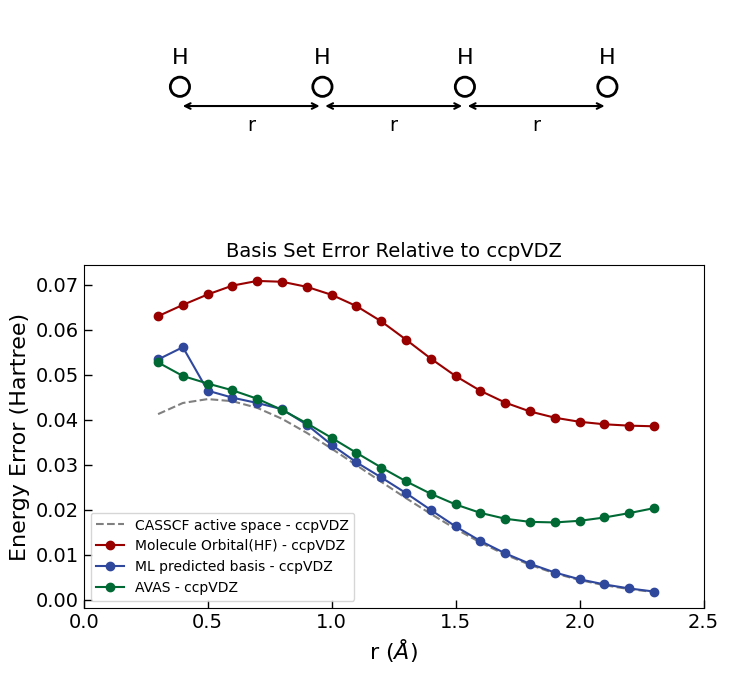

In [11]:

from matplotlib.patches import Circle
import matplotlib.gridspec as gridspec

def plot_cartoon_with_error(energy_data, name_l, method_index, methods):
    bond_length = 0.74
    positions = [i * bond_length for i in range(4)]
    
    methods_subset = ["CASSCF", "HF", "basisNN", "ccpVDZ", "AVAS"]
    mycolor = {"CASSCF": None, "HF": (153/255, 0/255, 0/255) , "basisNN": (48/255, 72/255, 156/255), "ccpVDZ": None, "AVAS": (0/255, 105/255, 52/255)}
    numeric_values = np.array([int(name.split('.')[0]) for name in name_l])
    sorted_indices = np.argsort(numeric_values)
    
    name_method = get_name_method_mapping(methods)
    
    # Generate lengths
    lengths = [bond_length_interval * point for point in range(3, num_chains + 1)]
    
    # ======= CREATE FIGURE AND GRIDSPEC =======
    fig = plt.figure(figsize=(8, 8))
    gs = gridspec.GridSpec(nrows=2, ncols=1, height_ratios=[1, 2])
    
    # ------- Panel 1: Molecule cartoon -------
    ax0 = fig.add_subplot(gs[0])
    radius = 0.05
    for x in positions:
        circle = Circle((x, 0), radius=radius, edgecolor='black', facecolor='white', linewidth=2)
        ax0.add_patch(circle)
        ax0.text(x, 0.1, 'H', ha='center', va='bottom', fontsize=16)
    
    arrow_y = -0.1
    for i in range(len(positions) - 1):
        x0, x1 = positions[i], positions[i + 1]
        ax0.annotate('', xy=(x1, arrow_y), xytext=(x0, arrow_y),
                     arrowprops=dict(arrowstyle='<->', color='black', linewidth=1.5))
        ax0.text((x0 + x1) / 2, arrow_y - 0.05, 'r', ha='center', va='top', fontsize=14)
    
    ax0.set_xlim(-0.5, positions[-1] + 0.5)
    ax0.set_ylim(-0.3, 0.4)
    ax0.set_aspect('equal')
    ax0.axis('off')
    
    # ------- Panel 2: Error plot -------
    ax1 = fig.add_subplot(gs[1])
    baseline_energy = np.array(energy_data['ccpVDZ'])[sorted_indices]
    
    for method in methods_subset:
        if method != 'ccpVDZ' and energy_data[method]:
            i = method_index[method]
            error = np.array(energy_data[method])[sorted_indices] - baseline_energy
            if method != 'CASSCF':
                ax1.plot(lengths[:-2], error[:-2], label=f"{name_method[method]} - ccpVDZ",
                         color=mycolor[method], marker='o', markerfacecolor=mycolor[method])
            else:
                print(error[:-2])
                ax1.plot(lengths[:-2], error[:-2], label=f"{name_method[method]} - ccpVDZ",
                         color='grey', markerfacecolor='white', linestyle='--')
    
    ax1.set_title("Basis Set Error Relative to ccpVDZ", fontsize=14)
    ax1.set_xlabel("r ($\AA$)", fontsize=16)
    ax1.set_ylabel("Energy Error (Hartree)", fontsize=16)
    plt.tick_params(axis='both', direction='in', length=6, width=1, labelsize=14)
    plt.xlim(0, 2.5)
    #plt.ylim(0, 0.08)
    
    ax1.legend()
    
    # ------- Layout & Save -------
    plt.subplots_adjust(hspace=0.4)
    plt.savefig("figs/H4_cartoon_error_plot.pdf", metadata={"TextAsShapes": False})
    plt.show()
    
    return ax1

ax1 = plot_cartoon_with_error(data['energy_data'], data["energy_data"]['name'], method_index, methods)

/tmp/ipykernel_116970/1208715540.py:15: UserWarning: Unknown infodict keyword: 'TextAsShapes'. Must be one of {'CreationDate', 'Author', 'Title', 'ModDate', 'Producer', 'Trapped', 'Subject', 'Keywords', 'Creator'}.
  fig_legend.savefig("figs/H4_legend_only.pdf", metadata={"TextAsShapes": False})


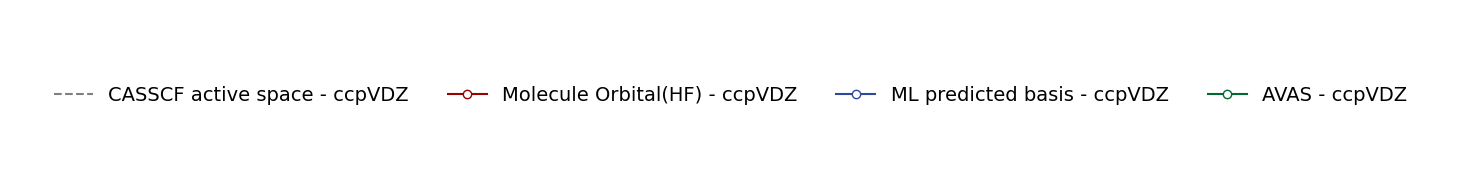

In [10]:


def save_legend_separately(ax1):
    # Reuse handles and labels from the main plot
    handles, labels = ax1.get_legend_handles_labels()
    
    # Create a separate figure for the legend
    fig_legend = plt.figure(figsize=(16, 2))
    ax_legend = fig_legend.add_subplot(111)
    ax_legend.axis('off')
    
    # Draw the legend
    legend = ax_legend.legend(handles, labels, loc='center', ncol=5, fontsize=14, frameon=False)
    
    # Save or show
    plt.tight_layout()
    fig_legend.savefig("figs/H4_legend_only.pdf", metadata={"TextAsShapes": False})
    plt.show()

save_legend_separately(ax1)